# Indenficação de doênças em folha de milho com Deep Leaning

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tqdm import tqdm, trange
import cv2
from random import shuffle

## Classes usadas para indeficação de doeças em folhas de milho
   * Doença (Não indeficada)
   * Ferrugem comum
   * Mancha de Folha Cinza
   * Normal (Milho saudável )
   

In [2]:
caminho_img = "datasets/Corn or Maize Leaf Disease Dataset/data/"
dire_images = os.listdir(caminho_img)
dire_images

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

### Analizando os dados

In [3]:
no_indetica = os.listdir(caminho_img+dire_images[0])
ferrugem = os.listdir(caminho_img+dire_images[1])
folha_cinza = os.listdir(caminho_img+dire_images[2])
normal = os.listdir(caminho_img+dire_images[3])

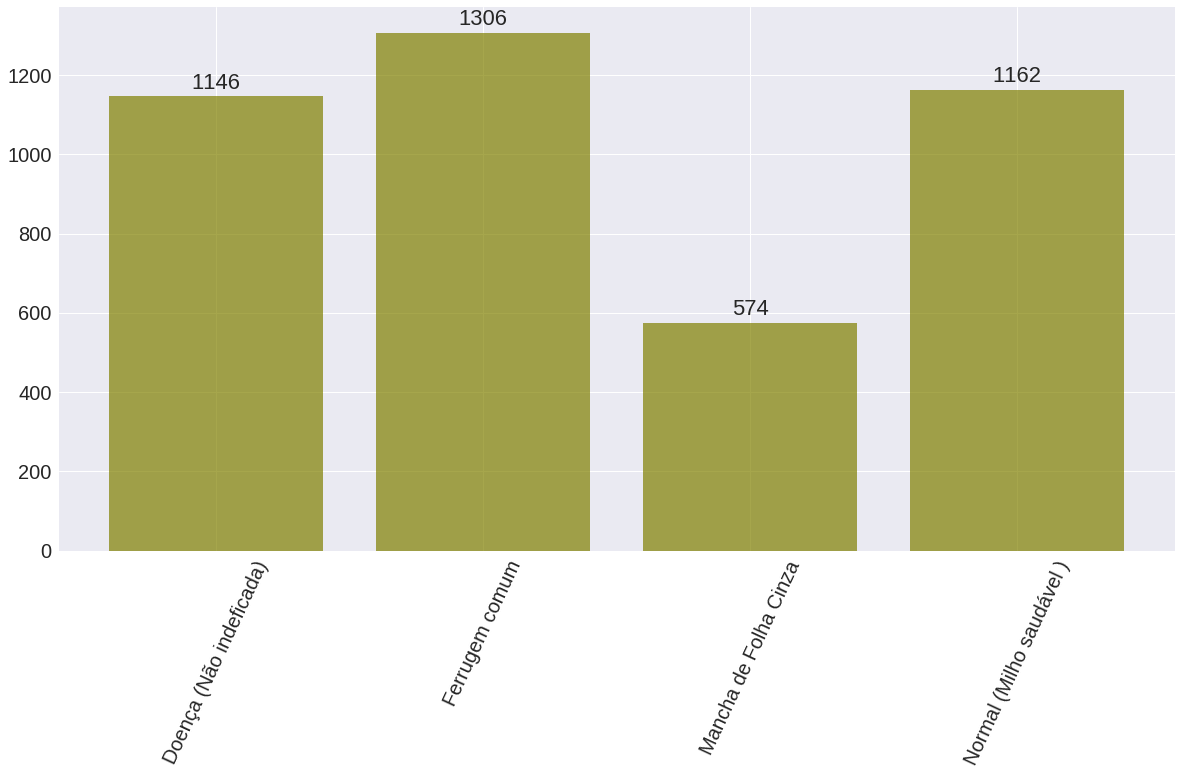

In [4]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.figure(figsize=(20,10))
plt.style.use('seaborn') # stilo do  grafico
objects = ('Doença (Não indeficada)', 'Ferrugem comum', 'Mancha de Folha Cinza', 'Normal (Milho saudável )')
y_pos = np.arange(len(objects))
performance = [ len(no_indetica), len(ferrugem), len(folha_cinza), len(normal)]
plt.xticks(rotation=65)
plt.rcParams.update({'font.size': 22})
rc1=plt.bar(y_pos, performance, align='center', alpha=0.7, color='#808000')
plt.xticks(y_pos, objects, fontsize=20)
plt.yticks(fontsize=20)
autolabel(rc1)
plt.show()

#### Imagens Normal (Milho saudável )

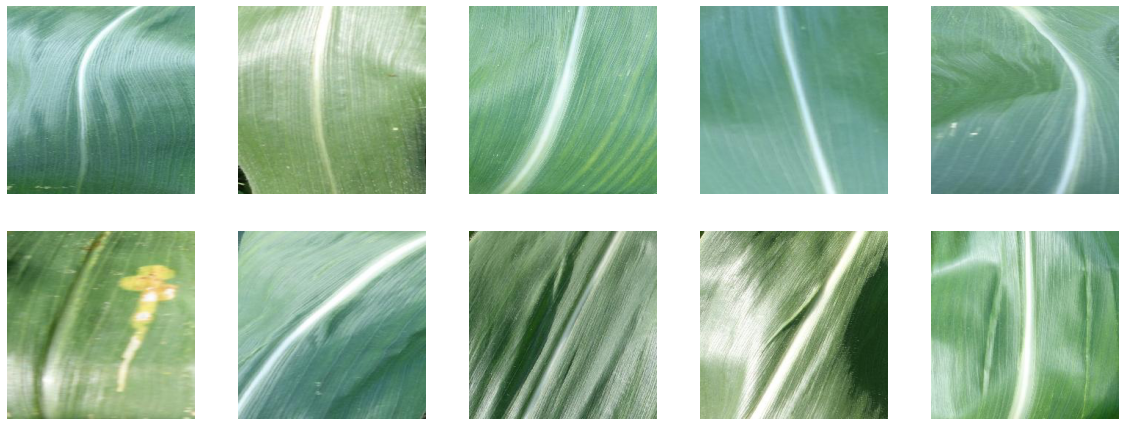

In [5]:
# Imagens normal
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = plt.imread(caminho_img+dire_images[3]+"/"+str(normal[i])) # Lendo uma imagem do dataset
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()

#### Imagens com Doença (Não indeficada)

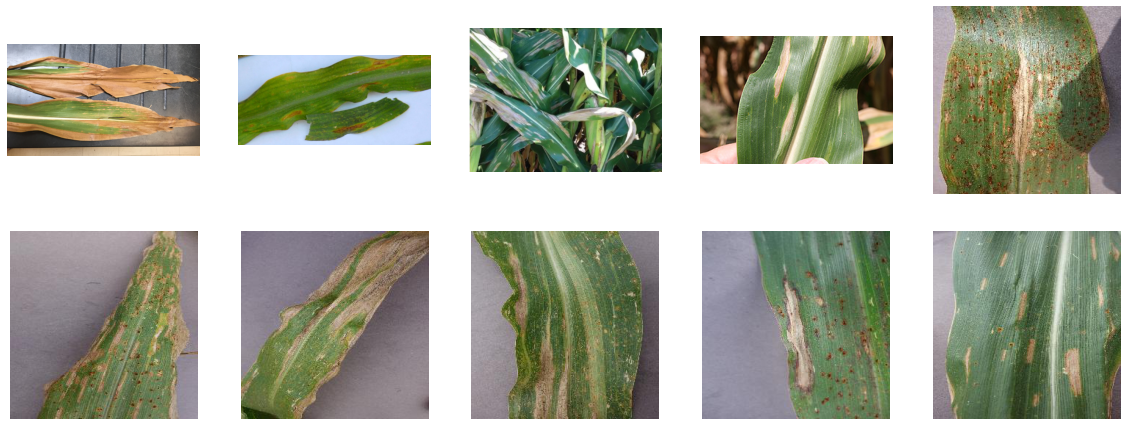

In [6]:
# Imagens Doença (Não indeficada)
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = plt.imread(caminho_img+dire_images[0]+"/"+str(no_indetica[i])) # Lendo uma imagem do dataset
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()

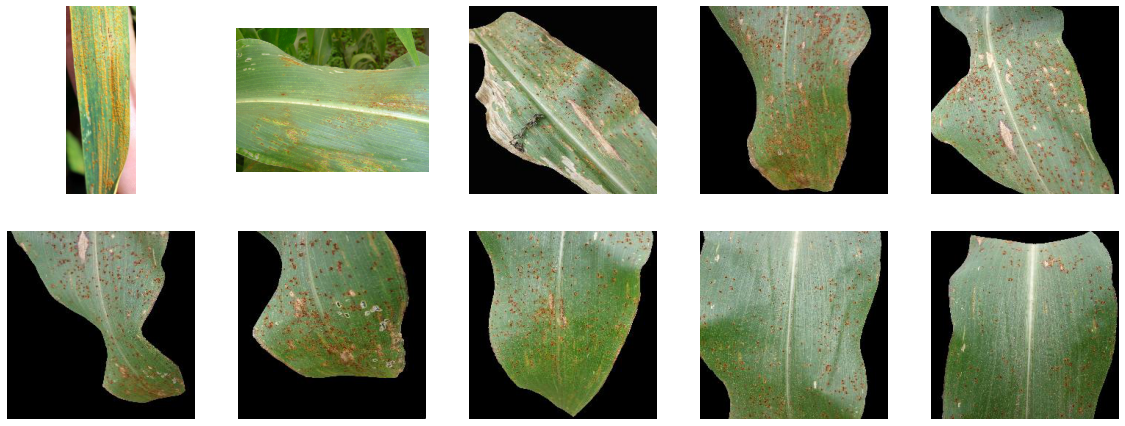

In [7]:
# Imagens Doença (Não indeficada)
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = plt.imread(caminho_img+dire_images[1]+"/"+str(ferrugem[i])) # Lendo uma imagem do dataset
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()

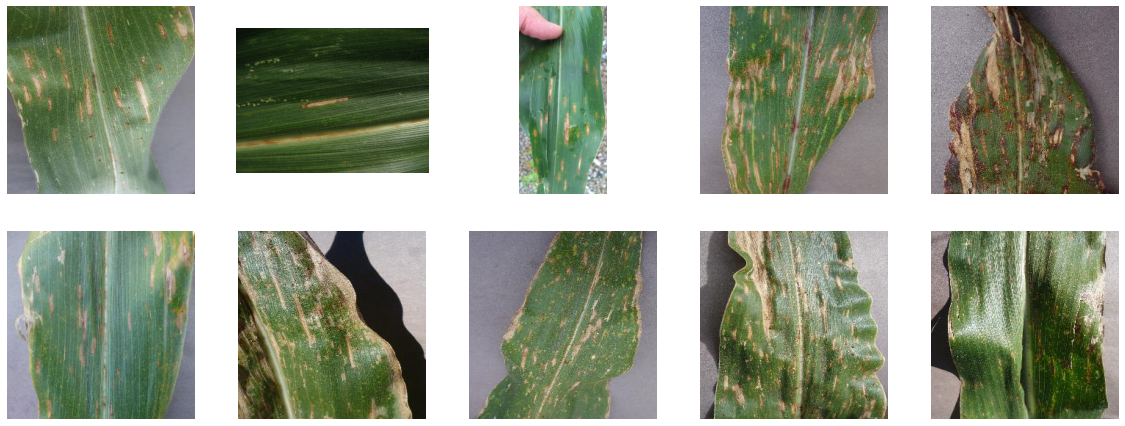

In [8]:
# Imagens Doença (Não indeficada)
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = plt.imread(caminho_img+dire_images[2]+"/"+str(folha_cinza[i])) # Lendo uma imagem do dataset
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()

# Primeira classificação (Normal x doente)

### Leitura e normalização dos dados (Imagens)

In [4]:
# Imagens normal
caminho_img_normal = [] 
y_data_0 = [] # labens imagens normal
for i in tqdm(normal):
    caminho_img_normal.append(caminho_img+dire_images[3]+"/"+i)
    y_data_0.append(0) 

# Imgens com doeças não indeficada
caminho_img_doent = []
y_data_1 = []
for i in tqdm(no_indetica):
    caminho_img_doent.append(caminho_img+dire_images[0]+"/"+i)
    y_data_1.append(1)
    
# Imagens com ferrugem 
caminho_img_ferrugem = []
y_data_2 = []
for i in tqdm(ferrugem):
    caminho_img_ferrugem.append(caminho_img+dire_images[1]+"/"+i)
    y_data_2.append(1)
    
# Imagens com manchas cinzar
caminho_img_cinza = []
y_data_3 = []
for i in tqdm(folha_cinza):
    caminho_img_cinza.append(caminho_img+dire_images[2]+"/"+i)
    y_data_3.append(1)

100%|██████████| 574/574 [00:00<00:00, 1366362.37it/s]


In [6]:
y_data_all = y_data_0+y_data_1+y_data_2+y_data_3 # All labels images
all_file_names = caminho_img_normal+caminho_img_doent+caminho_img_ferrugem+caminho_img_cinza


In [7]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.utils import shuffle



# One hot vector representation of labels
y_labels_one_hot = to_categorical(y_data_all)
# shuffle the dataset so as to remove any symmetry from our dataset.
filenames_shuffled, y_labels_one_hot_shuffled = shuffle(all_file_names, y_labels_one_hot)
filenames_shuffled = np.array(filenames_shuffled)

# File Diovision names in train 70% and test 30%
X_train_filenames, X_test_filenames, y_train, y_test = train_test_split(
    filenames_shuffled, y_labels_one_hot_shuffled, test_size=0.3, random_state=1)

In [8]:
x_train = []
x_test = []
img_size = 128
for i in tqdm(X_train_filenames):
    img = cv2.imread(i)
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32')/255
    x_train.append(img)

for i in tqdm(X_test_filenames):
    img = cv2.imread(i)
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32')/255
    x_test.append(img)

100%|██████████| 1257/1257 [00:02<00:00, 430.64it/s]


In [12]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [20]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(x_train.shape[0], img_size,img_size,3)#CNN input format (x,sizeImge,sizeImge,channels)
x_test = x_test.reshape(x_test.shape[0], img_size,img_size,3)#CNN input format (x,sizeImge,sizeImge,channels)

img_shape = (128, 128, 3) # input image in model
base_model = tf.keras.applications.MobileNetV2(input_shape = img_shape, include_top = False, weights = "imagenet")

In [14]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [15]:
base_model.output
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x1 = tf.keras.layers.Dense(units=128, activation='relu')(global_average_layer)
d1 = tf.keras.layers.Dropout(0.2)(x1)
x2 = tf.keras.layers.Dense(units=64, activation='relu')(d1)
d2 = tf.keras.layers.Dropout(0.2)(x2)
x3 = tf.keras.layers.Dense(units=32, activation='relu')(d2)

prediction_layer = tf.keras.layers.Dense(units=2, activation='sigmoid')(x3)
model = tf.keras.models.Model(inputs =base_model.input, outputs = prediction_layer)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.0001), loss= "binary_crossentropy", metrics=["accuracy"])


In [17]:
#Setting Network Hyperparameters"""
EPOCHS = 40 #Epocha number
INIT_LR = 1e-3 #Learning rate
BS = 35 # batch size, amount of images that will pass through the network in each season

#Save model treined
checkpoint_filepath = 'saved_model/best-model-NormalxDoente/model'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


#here a keras technique is used to improve training accuracy, the images are molded for the network to learn better
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")


# CNN trained by passing training and test data jutamnete with hyperparameters
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    epochs=EPOCHS, steps_per_epoch=len(x_train) // BS
    , verbose=1, callbacks=[model_checkpoint_callback])

/home/bruno/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
83/83 [==============================] - 59s 444ms/step - loss: 0.2959 - accuracy: 0.8701 - val_loss: 5.8703 - val_accuracy: 0.2753
Epoch 2/40
83/83 [==============================] - 9s 109ms/step - loss: 0.0290 - accuracy: 0.9924 - val_loss: 8.1575 - val_accuracy: 0.2745
Epoch 3/40
83/83 [==============================] - 9s 109ms/step - loss: 0.0215 - accuracy: 0.9960 - val_loss: 4.7130 - val_accuracy: 0.4177
Epoch 4/40
83/83 [==============================] - 9s 109ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 9.0258 - val_accuracy: 0.2808
Epoch 5/40
83/83 [==============================] - 9s 109ms/step - loss: 0.0141 - accuracy: 0.9949 - val_loss: 8.5133 - val_accuracy: 0.2944
Epoch 6/40
83/83 [==============================] - 9s 109ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 9.8970 - val_accuracy: 0.3039
Epoch 7/40
83/83 [==============================] - 9s 109ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 4.7095 - val_accuracy: 0.5784
Epoch

In [17]:
model.load_weights('saved_model/best-model-NormalxDoente/model')
model.save(checkpoint_filepath) 

In [26]:
teste = x_train[0]
teste = teste.reshape(1, 128, 128, 3)

In [32]:
result = model.predict(teste)
voalor_certeza = np.max(result)
classe = np.argmax(result)
print(voalor_certeza)
print(classe)

0.9999999
1


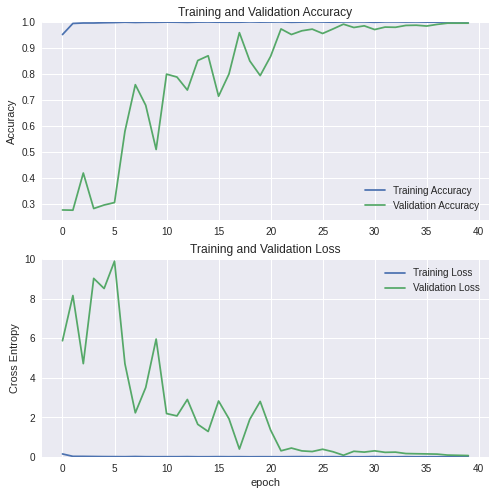

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.style.use('seaborn') # stilo do  grafico
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,10.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from keras.models import load_model, Model
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       343
           1       1.00      0.99      1.00       914

    accuracy                           1.00      1257
   macro avg       0.99      1.00      0.99      1257
weighted avg       1.00      1.00      1.00      1257

Confusion matrix, without normalization


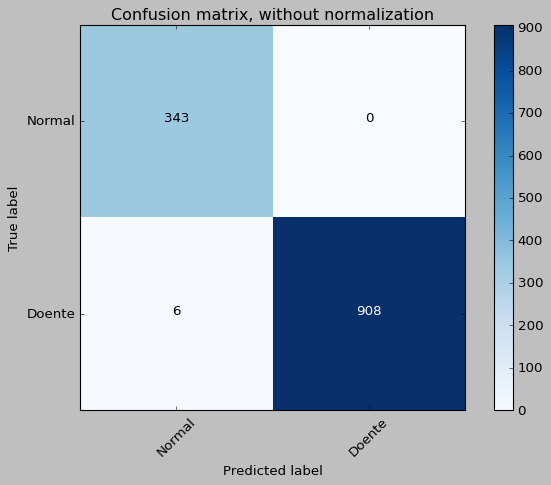

In [30]:

yhat_probs = model.predict(x_test, verbose=0)
yhat_classes = np.argmax(yhat_probs,axis=1)

y = np.argmax(y_test,axis=1)
accuracy = accuracy_score(y , yhat_classes)


print(classification_report(y_test.argmax(axis=1), yhat_probs.argmax(axis=1)))


plt.style.use('classic') # stilo do  grafico

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), yhat_probs.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Doente'],
                      title='Confusion matrix, without normalization')

In [32]:
accuracy = accuracy_score(y , yhat_classes)
print('Accuracy: %f' % accuracy)


# precision tp / (tp + fp)
precision = precision_score(y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)


recall = recall_score(y, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y, yhat_classes)
print('ROC AUC: %f' % auc)

Accuracy: 0.995227
Precision: 1.000000
Recall: 0.993435
F1 score: 0.996707
Cohens kappa: 0.988037
ROC AUC: 0.996718
